## CMPINF 2100 Week 13
### Making CLASSIFICATIONS with LOGISTIC REGRESSION
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

## Read data
We wil use the SAME dataset from last week.

In [6]:
df = pd.read_csv("../week_12/week_11_intro_binary_classification.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [8]:
df.nunique()

x    115
y      2
dtype: int64

In [9]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

## Fit the logistic regression model
Fit a model with a LINEAR RELATIONSHIP between the LOGODDS RATIO and the input.

In [10]:
fit_glm = smf.logit(formula="y ~ x", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


In [11]:
fit_glm.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [12]:
fit_glm.bse

Intercept    0.218009
x            0.267133
dtype: float64

In [13]:
fit_glm.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

In [14]:
def my_coefplot(mod, figsize_use=(10,4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar(y=mod.params.index,
               x=mod.params,
               xerr=2*mod.bse, fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle="--", linewidth=3.5, color="grey")

    ax.set_xlabel("coefficient value")

    plt.show()

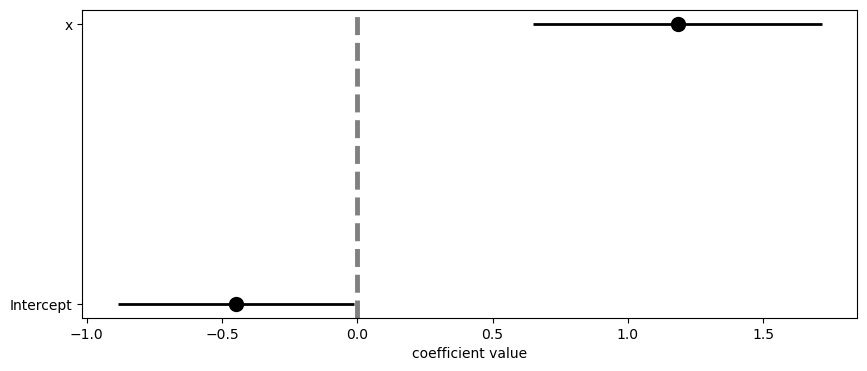

In [15]:
my_coefplot(fit_glm)

## Predictions on a new data set
Lets visualize the PREDICTED PROBABILITY on a NEW visualization grid.

In [16]:
dfviz = pd.DataFrame({"x": np.linspace(-2.75, 2.75, num=101)})

In [17]:
dfviz["pred_probability"] = fit_glm.predict(dfviz)

In [18]:
dfviz

,x,pred_probability
0,-2.750,0.024009
1,-2.695,0.025583
2,-2.640,0.027258
3,-2.585,0.029038
4,-2.530,0.030931
...,...,...
96,2.530,0.927273
97,2.585,0.931543
98,2.640,0.935580
99,2.695,0.939395


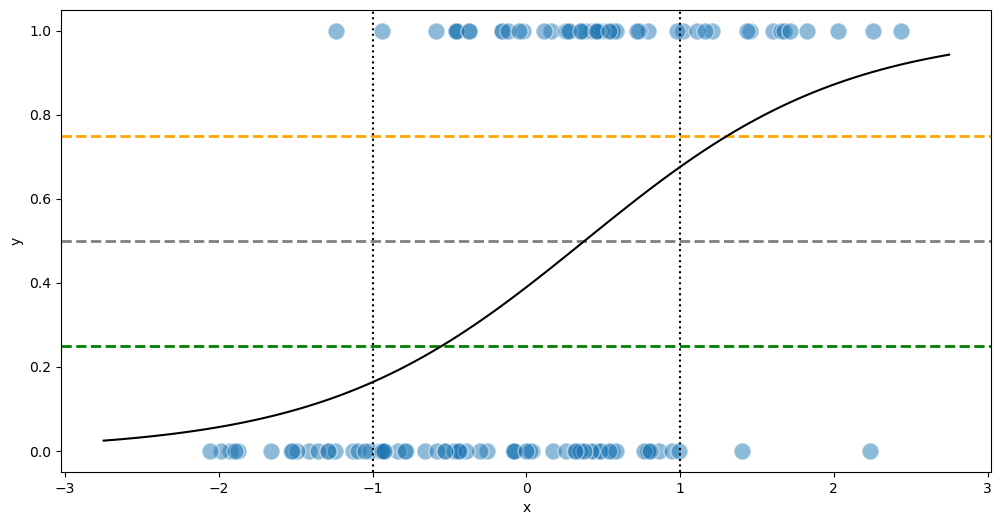

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df, x="x", y="y", s=150, alpha=0.5)

ax.axhline(y=0.25, color="green", linestyle="--", linewidth=2)

ax.axhline(y=0.5, color="grey", linestyle="--", linewidth=2)

ax.axhline(y=0.75, color="orange", linestyle="--", linewidth=2)

ax.axvline(x=-1, color="black", linestyle=":")

ax.axvline(x=1, color="black", linestyle=":")

sns.lineplot(data=dfviz, x="x", y="pred_probability", color="k")

plt.show()

Comparing Counts and Probabilities

At low probabilities (less than 25%), we see more non-events than events.

At high probabilities (greater than 75%), we see more events than non-events.

_________________
Lets reinforce the IDEA of probability vs EVENT and NON-EVENT one more time but using the TRAINING SET.

In [21]:
df_copy = df.copy()

Convert the continuous input into a NON-NUMERIC or CATEGORICAL variable. However, we will NOT directly make all unique values of the input vategories. Instead, we will DISCRETIZE or **BIN** the input into **CUT** intervals.

The pd.cut() function will **CUT** a continuous variable into **INTERVALS**

In [22]:
df_copy.head()

,x,y
0,-0.457429,1
1,0.425948,1
2,-0.784695,0
3,-1.925209,0
4,2.252617,1


In [23]:
df_copy["x_bin"] = pd.cut(df.x, [df.x.min(), -1, 1, df.x.max()], include_lowest=True, ordered=True)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x       115 non-null    float64 
 1   y       115 non-null    int64   
 2   x_bin   115 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 2.2 KB


In [26]:
df_copy.nunique()

x        115
y          2
x_bin      3
dtype: int64

In [27]:
df_copy.x_bin.value_counts()

x_bin
(-1.0, 1.0]      80
(-2.06, -1.0]    19
(1.0, 2.439]     16
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


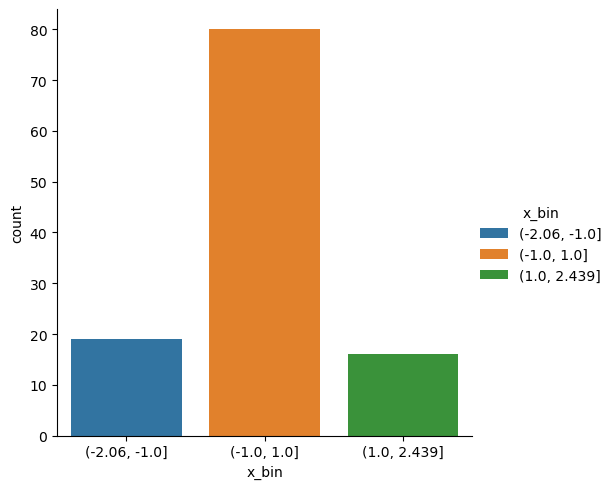

In [31]:
sns.catplot(data=df_copy, x="x_bin", hue="x_bin", kind="count")

plt.show()

Let's group and summarize within each input bin to calculate the NUMBER OF EVENTS and the PROPORTION of EVENTS.

In [34]:
df_copy.groupby("x_bin").\
aggregate(num_rows=("y", "count"),
         num_events=("y", "sum"),
         prop_events=("y", "mean")).\
reset_index()

,x_bin,num_rows,num_events,prop_events
0,"(-2.06, -1.0]",19,1,0.052632
1,"(-1.0, 1.0]",80,33,0.412500
2,"(1.0, 2.439]",16,14,0.875000


Why does this matter?

The LOGISTIC REGRESSION MODEL does **NOT** CLASSIFY EVENT or NON-EVENT.

The LOGISTIC REGRESSION model **PREDICTS** the EVENT PROBABILITY!!!

The EVENT PROBABILITY represents what we **EXPECT** to see!!!

It does not represent what an INDIVIDUAL OBSERVATION is. The PREDICTED PROBABILITY is the **EXPECTED PROPORTION OF EVENTS**!!!!

But how can we make a CLASSIFICATION of a SINGLE OBSERVATION!!!

## Decisions and Classification
We must CONVERT our PREDICTED PROBABILITY from a number between 0 and 1 to a CLASS or a BINARY value!!

We must DECIDE which OUTPUT CATEGORY the observation is based on our PREDICTED PROBABILITY!!

But making the decisions iS VERY STRAIGHT FORWARD. Making the decision essentially makes sense.

CLASSIFICATIONS are created by comparing the PREDICTED PROBABILITY to a THRESHOLD VALUE.

* IF the PREDICTED PROBABILITY is GREATER than the THRESHOLD, we CLASSIFY the **EVENT**
* IF the PREDICTED PROBABILITY is LESS than the THRESHOLD, we CLASSIFY the **NON-EVENT**

Lets PREDICT the TRAINING SET instead of the VISUALIZATION GRID. 

In [35]:
df_copy.head()

,x,y,x_bin
0,-0.457429,1,"(-1.0, 1.0]"
1,0.425948,1,"(-1.0, 1.0]"
2,-0.784695,0,"(-1.0, 1.0]"
3,-1.925209,0,"(-2.06, -1.0]"
4,2.252617,1,"(1.0, 2.439]"


In [36]:
df_copy.shape

(115, 3)

Make the prediction and assign the PREDICTED probability to a COLUMN.

In [37]:
df_copy["pred_probability"] = fit_glm.predict(df)

In [38]:
df_copy

,x,y,x_bin,pred_probability
0,-0.457429,1,"(-1.0, 1.0]",0.270709
1,0.425948,1,"(-1.0, 1.0]",0.513678
2,-0.784695,0,"(-1.0, 1.0]",0.201258
3,-1.925209,0,"(-2.06, -1.0]",0.061306
4,2.252617,1,"(1.0, 2.439]",0.901780
...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933
111,0.452238,1,"(-1.0, 1.0]",0.521449
112,0.535510,1,"(-1.0, 1.0]",0.545976
113,-0.532739,0,"(-1.0, 1.0]",0.253472


If the PREDICTED PROBABILITY is GREATER than a threshold, classify the EVENT.

The COMMON and DEFAULT threshold is 50%!!!

In [39]:
df_copy.pred_probability > 0.5

0      False
1       True
2      False
3      False
4       True
       ...  
110    False
111     True
112     True
113    False
114    False
Name: pred_probability, Length: 115, dtype: bool

I prefer to CLASSIFY using the np.where function.

This is an IN-LINE IF-ELSE statement.

The syntax is:

`np.where(<CONDITIONAL TEST>, <VALUE IF TRUE>, <VALUE IF FALSE>)`

In [42]:
np.where(df_copy.pred_probability > 0.5, 1, 0)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0])

In [43]:
df_copy

,x,y,x_bin,pred_probability
0,-0.457429,1,"(-1.0, 1.0]",0.270709
1,0.425948,1,"(-1.0, 1.0]",0.513678
2,-0.784695,0,"(-1.0, 1.0]",0.201258
3,-1.925209,0,"(-2.06, -1.0]",0.061306
4,2.252617,1,"(1.0, 2.439]",0.901780
...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933
111,0.452238,1,"(-1.0, 1.0]",0.521449
112,0.535510,1,"(-1.0, 1.0]",0.545976
113,-0.532739,0,"(-1.0, 1.0]",0.253472


Lets assign the PREDICTED CLASSIFICATIONS to a NEW column!!!

In [45]:
df_copy["pred_class"] = np.where(df_copy.pred_probability > 0.5, 1, 0)

In [46]:
df_copy

,x,y,x_bin,pred_probability,pred_class
0,-0.457429,1,"(-1.0, 1.0]",0.270709,0
1,0.425948,1,"(-1.0, 1.0]",0.513678,1
2,-0.784695,0,"(-1.0, 1.0]",0.201258,0
3,-1.925209,0,"(-2.06, -1.0]",0.061306,0
4,2.252617,1,"(1.0, 2.439]",0.901780,1
...,...,...,...,...,...
110,-0.791672,0,"(-1.0, 1.0]",0.199933,0
111,0.452238,1,"(-1.0, 1.0]",0.521449,1
112,0.535510,1,"(-1.0, 1.0]",0.545976,1
113,-0.532739,0,"(-1.0, 1.0]",0.253472,0


In [47]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


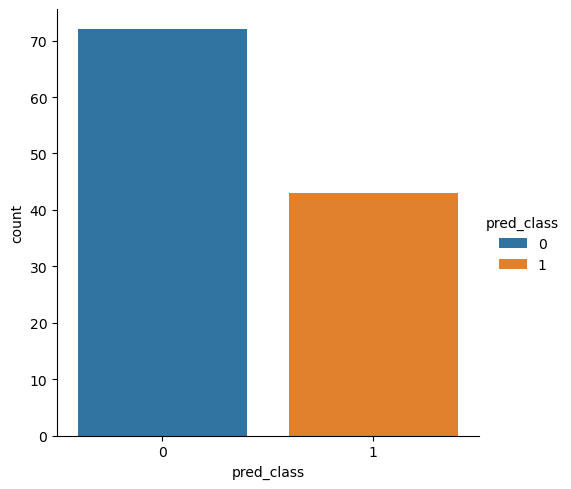

In [51]:
sns.catplot(data=df_copy, x="pred_class", hue="pred_class", kind="count")

plt.show()